In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import re
import seaborn as sns 

In [2]:
df = pd.read_excel('kriminalität_schweiz_NEU.xlsx')

In [3]:
df.head()

,Unnamed: 0,14 0,15 0,16 0,17 0,tot_adults,18 19,20 24,25 29,30 34,35 39,40 44,45 49,50 59,60 69,70 0
0,1984,0,0,0,0,20440,1777,5536,3851,2685,2091,1506,1071,1285,521,117
1,1985,0,0,0,0,20262,1602,5433,3771,2744,2105,1563,1100,1291,505,148
2,1986,0,0,0,0,20981,1628,5495,4124,2804,2182,1646,1116,1344,510,132
3,1987,0,0,0,0,20831,1709,5347,4042,2771,2122,1659,1108,1343,566,164
4,1988,0,0,0,0,20159,1536,5241,4003,2787,1973,1537,1146,1311,481,144


In [4]:
df['year'] = df['Unnamed: 0']

In [5]:
df.head()

,Unnamed: 0,14 0,15 0,16 0,17 0,tot_adults,18 19,20 24,25 29,30 34,35 39,40 44,45 49,50 59,60 69,70 0,year
0,1984,0,0,0,0,20440,1777,5536,3851,2685,2091,1506,1071,1285,521,117,1984
1,1985,0,0,0,0,20262,1602,5433,3771,2744,2105,1563,1100,1291,505,148,1985
2,1986,0,0,0,0,20981,1628,5495,4124,2804,2182,1646,1116,1344,510,132,1986
3,1987,0,0,0,0,20831,1709,5347,4042,2771,2122,1659,1108,1343,566,164,1987
4,1988,0,0,0,0,20159,1536,5241,4003,2787,1973,1537,1146,1311,481,144,1988


In [6]:
df1 = pd.melt(df.drop(columns=['Unnamed: 0', 'tot_adults'], axis=1), id_vars='year', value_vars=["14 0", "15 0", "16 0", "17 0",
        '18 19',
       '20 24', '25 29',
       '30 34', '35 39',
       '40 44', '45 49',
       '50 59', '60 69',
       "70 0"], var_name='age', value_name='crimes')

df1 = pd.melt(df.drop(columns=['Unnamed: 0', 'tot_adults'], axis=1), id_vars='year', value_vars=['bis 14 Jahre', '15 Jahre', '16 Jahre', 'ab 17 Jahre',
        'zwischen\n18 und\n19 Jahre',
       'zwischen\n20 und\n24 Jahre', 'zwischen\n25 und\n29 Jahre',
       'zwischen\n30 und\n34 Jahre', 'zwischen\n35 und\n39 Jahre',
       'zwischen\n40 und\n44 Jahre', 'zwischen\n45 und\n49 Jahre',
       'zwischen\n50 und\n59 Jahre', 'zwischen\n60 und\n69 Jahre',
       '70 Jahre und älter'], var_name='age', value_name='crimes')

In [7]:
df1.tail()

,year,age,crimes
485,2014,70 0,635
486,2015,70 0,637
487,2016,70 0,738
488,2017,70 0,708
489,2018 2,70 0,718


In [8]:
df1 = df1.astype(str)

In [9]:
df1.dtypes

year      object
age       object
crimes    object
dtype: object

In [10]:
df1['crime_year'] = df1['year']

In [11]:
df1.head()

,year,age,crimes,crime_year
0,1984,14 0,0,1984
1,1985,14 0,0,1985
2,1986,14 0,0,1986
3,1987,14 0,0,1987
4,1988,14 0,0,1988


In [12]:
df1.dtypes
df1['year'] = df1.year.astype(str)
df1.year.apply(lambda s: s[:5])

0       1984
1       1985
2       1986
3       1987
4       1988
5       1989
6       1990
7       1991
8       1992
9       1993
10      1994
11      1995
12      1996
13      1997
14      1998
15      1999
16      2000
17      2001
18      2002
19      2003
20      2004
21      2005
22      2006
23      2007
24      2008
25      2009
26      2010
27      2011
28      2012
29      2013
       ...  
460     1989
461     1990
462     1991
463     1992
464     1993
465     1994
466     1995
467     1996
468     1997
469     1998
470     1999
471     2000
472     2001
473     2002
474     2003
475     2004
476     2005
477     2006
478     2007
479     2008
480     2009
481     2010
482     2011
483     2012
484     2013
485     2014
486     2015
487     2016
488     2017
489    2018 
Name: year, Length: 490, dtype: object

In [13]:
df1['crime_year'] = df1['crime_year'].str.replace("2018 2", "2018")

In [14]:
df1.head()

,year,age,crimes,crime_year
0,1984,14 0,0,1984
1,1985,14 0,0,1985
2,1986,14 0,0,1986
3,1987,14 0,0,1987
4,1988,14 0,0,1988


In [15]:
df1 = df1.drop('year', 1)

In [16]:
df1.age.value_counts()

16 0     35
18 19    35
30 34    35
70 0     35
25 29    35
40 44    35
20 24    35
45 49    35
14 0     35
35 39    35
50 59    35
60 69    35
15 0     35
17 0     35
Name: age, dtype: int64

In [17]:
df1.sample(2)

,age,crimes,crime_year
391,50 59,1200,1990
282,35 39,2182,1986


In [18]:
df1.head()

,age,crimes,crime_year
0,14 0,0,1984
1,14 0,0,1985
2,14 0,0,1986
3,14 0,0,1987
4,14 0,0,1988


In [19]:
df1.to_csv('data_crimes.csv')

In [20]:
df1 = pd.read_csv('data_crimes.csv')

In [21]:
df1.head()

,Unnamed: 0,age,crimes,crime_year
0,0,14 0,0,1984
1,1,14 0,0,1985
2,2,14 0,0,1986
3,3,14 0,0,1987
4,4,14 0,0,1988


In [22]:
df1['age1'] = df1.age.astype(str).str.extract("(\d{2})")

In [23]:
df1['age2'] = df1.age.astype(str).str.extract("(\d+$)")

In [24]:
df1.head()

,Unnamed: 0,age,crimes,crime_year,age1,age2
0,0,14 0,0,1984,14,0
1,1,14 0,0,1985,14,0
2,2,14 0,0,1986,14,0
3,3,14 0,0,1987,14,0
4,4,14 0,0,1988,14,0


In [25]:
df1['birth_year1'] = df1.crime_year.astype(int) - df1.age1.astype(int)

In [26]:
df1.head()

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1
0,0,14 0,0,1984,14,0,1970
1,1,14 0,0,1985,14,0,1971
2,2,14 0,0,1986,14,0,1972
3,3,14 0,0,1987,14,0,1973
4,4,14 0,0,1988,14,0,1974


In [27]:
df1['birth_year2'] = df1.crime_year.astype(int) - df1.age2.astype(int)

In [28]:
df1.head(10)

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1,birth_year2
0,0,14 0,0,1984,14,0,1970,1984
1,1,14 0,0,1985,14,0,1971,1985
2,2,14 0,0,1986,14,0,1972,1986
3,3,14 0,0,1987,14,0,1973,1987
4,4,14 0,0,1988,14,0,1974,1988
5,5,14 0,0,1989,14,0,1975,1989
6,6,14 0,0,1990,14,0,1976,1990
7,7,14 0,0,1991,14,0,1977,1991
8,8,14 0,0,1992,14,0,1978,1992
9,9,14 0,0,1993,14,0,1979,1993


In [29]:
df1['cohort'] = df1['birth_year1']

In [30]:
df1.head()

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1,birth_year2,cohort
0,0,14 0,0,1984,14,0,1970,1984,1970
1,1,14 0,0,1985,14,0,1971,1985,1971
2,2,14 0,0,1986,14,0,1972,1986,1972
3,3,14 0,0,1987,14,0,1973,1987,1973
4,4,14 0,0,1988,14,0,1974,1988,1974


In [31]:

# df['my_channel'].mask(df['my_channel'] > 20000, 0, inplace=True)


In [32]:
df1.sample()

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1,birth_year2,cohort
328,328,40 44,1807,1997,40,44,1957,1953,1957


In [33]:
df1.loc[df1['crime_year'] != df1['birth_year2'], 'cohort'] = df1[['birth_year2','birth_year1']]

In [34]:
df1.head()

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1,birth_year2,cohort
0,0,14 0,0,1984,14,0,1970,1984,1970.0
1,1,14 0,0,1985,14,0,1971,1985,1971.0
2,2,14 0,0,1986,14,0,1972,1986,1972.0
3,3,14 0,0,1987,14,0,1973,1987,1973.0
4,4,14 0,0,1988,14,0,1974,1988,1974.0


In [35]:
# df1['cohort'] = [df1.birth_year1 if x == 0 for x in df1['age2']]

# df1['cohort'] = np.where(df1['age2']==0, df1.birth_year1)


df1 = df1.assign(cohort=(df1.birth_year1).where(df1.age2 == 0))


In [36]:
df1.sample(5)

,Unnamed: 0,age,crimes,crime_year,age1,age2,birth_year1,birth_year2,cohort
46,46,15 0,0,1995,15,0,1980,1995,NaN
196,196,20 24,5420,2005,20,24,1985,1981,NaN
277,277,30 34,4532,2016,30,34,1986,1982,NaN
363,363,45 49,1384,1997,45,49,1952,1948,NaN
357,357,45 49,1137,1991,45,49,1946,1942,NaN


In [37]:
df1['birth_year1'] = df1['birth_year1'].astype(str)

In [38]:
df1['birth_year2'] = df1['birth_year2'].astype(str)

In [39]:
df1['age2'] = df1['age2'].astype(int)

In [40]:
df1['cohort'] = df1[['birth_year2', 'birth_year1', 'age2']].apply(lambda x: '-'.join(x) if , axis=1)

SyntaxError: invalid syntax (<ipython-input-40-8f975e48c08a>, line 1)

In [ ]:
df1['cohort'] = df1[['birth_year2', 'birth_year1', 'age2']].apply(lambda x: '-'.join([x['birth_year2'], x['birth_year1']]) if str(x['age2']) != "0" else x['birth_year1'], axis=1)

In [ ]:
df1.to_csv('data_cohort_perfect.csv')

In [ ]:
df1.loc[df1.crime_year == df1.birth_year2, "cohort"] = df1.birth_year1

In [ ]:
df1.head()

In [ ]:
df1.sample(5)

In [ ]:
df1['cohort'] = np.where(df1.age2 == 0, df1.birth_year1, df1.cohort)

In [ ]:
df1.head()

In [ ]:
df1.head()

In [ ]:
df1.loc[df1.age2 == 0, "cohort"] = df1['birth_year1']

In [ ]:
df1.head()

In [ ]:
df1.groupby('cohort').crimes.sum().sort_values(ascending=False)

In [ ]:
df1.head()

In [ ]:
pd.DataFrame(df1.groupby('cohort').crimes.sum())

In [ ]:
pd.DataFrame(df1.groupby('cohort').crimes.sum().sort_values(ascending=False))

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df1.sample(10)

In [ ]:
X = df1[['crime_year']]
y = df1[['crimes']]

model = sm.OLS(y.astype(float), X).fit()
model.summary()

## the most criminal age cohorts in the last 20 years 

In [ ]:
df1.groupby('cohort').crimes.sum().sort_values(ascending=False).plot(kind='bar', figsize=(25,10))

In [ ]:
# sns.pairplot(data=df1, kind="reg")

In [ ]:
cohorts_true = df1[df1.age2 != 0]

In [ ]:
cohorts_true.groupby('cohort').crimes.sum().sort_values(ascending=False).plot(kind='bar', figsize=(25,10))

In [ ]:
df1.sample(5)

In [ ]:
df1['birth_year3'] = df1['birth_year2'].astype(int) + 1

In [ ]:
df1['birth_year3'] = Nan.


df1['cohort'] = df1[['birth_year2', 'birth_year1', 'age2']].apply(lambda x: '-'.join([x['birth_year2'], x['birth_year1']]) if str(x['age2']) != "0" else x['birth_year1'], axis=1)

In [ ]:
df1['birth_year4'] = df1['birth_year2'].astype(int) + 2

In [ ]:
df1['birth_year5'] = df1['birth_year2'].astype(int) + 3

In [ ]:
df1['birth_year6'] = df1['birth_year2'].astype(int) + 4

In [ ]:
df1.sample(20)

## new analysis

In [ ]:
df.head()

In [ ]:
df['18'] = round(df['18 19']/2).astype(int)

In [ ]:
df['19'] = round(df['18 19']/2).astype(int)

In [ ]:
df['20'] = round(df['20 24']/4).astype(int)

In [ ]:
df['21'] = round(df['20 24']/4).astype(int)

In [ ]:
df['22'] = round(df['20 24']/4).astype(int)

In [ ]:
df['23'] = round(df['20 24']/4).astype(int)

In [ ]:
df['24'] = round(df['20 24']/4).astype(int)

In [ ]:
df['14'] = df['14 0']

In [ ]:
df['15'] = df['15 0']

In [ ]:
df['16'] = df['16 0']

In [ ]:
df['17'] = df['17 0']

In [ ]:
df['70'] = df['70 0']

In [ ]:
df['25'] = round(df['25 29']/4).astype(int)
df['26'] = round(df['25 29']/4).astype(int)
df['27'] = round(df['25 29']/4).astype(int)
df['28'] = round(df['25 29']/4).astype(int)
df['29'] = round(df['25 29']/4).astype(int)

In [ ]:
df['30'] = round(df['30 34']/4).astype(int)
df['31'] = round(df['30 34']/4).astype(int)
df['32'] = round(df['30 34']/4).astype(int)
df['33'] = round(df['30 34']/4).astype(int)
df['34'] = round(df['30 34']/4).astype(int)

In [ ]:
df['35'] = round(df['35 39']/4).astype(int)
df['36'] = round(df['35 39']/4).astype(int)
df['37'] = round(df['35 39']/4).astype(int)
df['38'] = round(df['35 39']/4).astype(int)
df['39'] = round(df['35 39']/4).astype(int)

In [ ]:
df['40'] = round(df['40 44']/4).astype(int)
df['41'] = round(df['40 44']/4).astype(int)
df['42'] = round(df['40 44']/4).astype(int)
df['43'] = round(df['40 44']/4).astype(int)
df['44'] = round(df['40 44']/4).astype(int)

In [ ]:
df['45'] = round(df['45 49']/4).astype(int)
df['46'] = round(df['45 49']/4).astype(int)
df['47'] = round(df['45 49']/4).astype(int)
df['48'] = round(df['45 49']/4).astype(int)
df['49'] = round(df['45 49']/4).astype(int)

In [ ]:
df['50'] = round(df['50 59']/10).astype(int)
df['51'] = round(df['50 59']/10).astype(int)
df['52'] = round(df['50 59']/10).astype(int)
df['53'] = round(df['50 59']/10).astype(int)
df['54'] = round(df['50 59']/10).astype(int)
df['55'] = round(df['50 59']/10).astype(int)
df['56'] = round(df['50 59']/10).astype(int)
df['57'] = round(df['50 59']/10).astype(int)
df['58'] = round(df['50 59']/10).astype(int)
df['59'] = round(df['50 59']/10).astype(int)

In [ ]:
df['60'] = round(df['60 69']/10).astype(int)
df['61'] = round(df['60 69']/10).astype(int)
df['62'] = round(df['60 69']/10).astype(int)
df['63'] = round(df['60 69']/10).astype(int)
df['64'] = round(df['60 69']/10).astype(int)
df['65'] = round(df['60 69']/10).astype(int)
df['66'] = round(df['60 69']/10).astype(int)
df['67'] = round(df['60 69']/10).astype(int)
df['68'] = round(df['60 69']/10).astype(int)
df['69'] = round(df['60 69']/10).astype(int)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df = df[['year', '18', '19', '20', '21', '22', '23', '24', '14', '15',
       '16', '17', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70']]

In [ ]:
df.head()

In [ ]:
df1 = pd.melt(df, id_vars='year', value_vars=['18', '19', '20', '21', '22', '23', '24', '14', '15',
       '16', '17', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70'], var_name='age', value_name='crimes')

In [ ]:
df1.to_csv('data_best_0908.csv')

In [ ]:
df1 = pd.read_csv('data_best_0908.csv')

In [ ]:
df1['year'] = df1.year.astype(str)
# df1.year.apply(lambda s: s[:5])

In [ ]:
df1['year'] = df1['year'].str.replace("2018 2", "2018")

In [ ]:
df1.year.value_counts()

In [ ]:
df1['birth_year'] = df1.year.astype(int) - df1.age.astype(int)

In [ ]:
df1.head()

In [ ]:
df1['crime_year'] = df1['year']

In [ ]:
df1.to_csv('data_best_0908.csv')

In [50]:
df1 = pd.read_csv('data_best_0908.csv')

In [ ]:
df1.birth_year.value_counts().head(30)

In [ ]:
df1.head()

In [ ]:
# sns.pairplot(data=df1, kind='reg')

sns.lmplot(x="birth_year", y="crimes", data=df1)

## people with which birth date committed the most crimes from 1984 till 2018? 

In [ ]:
df1.groupby('birth_year').crimes.sum().sort_values().plot(kind='barh', figsize=(8,20))

In [ ]:
df1.groupby('age').crimes.sum().sort_values().plot(kind='barh', figsize=(8,20))

In [ ]:
df1.groupby(['age', 'birth_year']).crimes.sum().sort_values(ascending=False).head(100).plot(kind='barh', figsize=(10,25))

In [ ]:
sns.pairplot(data=df1, kind='reg')

In [ ]:
df1.groupby(['year', 'birth_year']).crimes.sum().sort_values(ascending=False).head(100).plot(kind='barh', figsize=(8,25))

In [ ]:
df1.groupby(['year', 'age']).crimes.sum().sort_values(ascending=False).head(100).plot(kind='barh', figsize=(20,35))

In [ ]:
df1.groupby(['year', 'age']).crimes.sum().sort_values(ascending=False)

In [ ]:
X = df1[['birth_year']]
y = df1[['crimes']]

model = sm.OLS(y, X).fit()
model.summary()

In [ ]:
df1.plot(x='birth_year', y='crimes', kind='scatter', figsize=(7, 7))

In [ ]:
sns.lmplot(x='birth_year', y='crimes', data=df1)

In [51]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,year,age,crimes,birth_year,crime_year
0,0,0,1984,18,888,1966,1984
1,1,1,1985,18,801,1967,1985
2,2,2,1986,18,814,1968,1986
3,3,3,1987,18,854,1969,1987
4,4,4,1988,18,768,1970,1988


In [ ]:
pd.DataFrame(df1.groupby('birth_year').crimes.sum().sort_values())
pd.DataFrame(df1.birth_year.value_counts())

In [ ]:
merged = merged[['norm_crime']]

In [ ]:
merged["birth_year"]=merged.index

In [ ]:
merged.head()

In [ ]:
merged2 = pd.merge(df1, merged, on='birth_year')

In [ ]:
merged2.head()

In [ ]:
merged2.groupby('birth_year').norm_crime.sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,6))

In [ ]:
df1.head()

In [52]:
df6 = pd.read_excel('gdp_clean.xlsx')

In [46]:
round(df5.BIP_mio)

NameError: name 'df5' is not defined

In [ ]:
df1.groupby('birth_year').crimes.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,8))

In [ ]:
df1.head()

# sns.heatmap(df, annot=True)

df5 = df1[['birth_year', 'crimes']]

In [ ]:
df5.head()

In [ ]:
sns.heatmap(df5, annot=True)

In [53]:
df6 = df6.dropna()

In [54]:
df6['BIP_mio'] = df6['BIP_mio'].astype(int)

In [55]:
df7 = pd.merge(df6, df1, left_on='year', right_on='birth_year')

In [56]:
df7.birth_year.value_counts()

1948    35
1959    35
1970    35
1969    35
1968    35
1967    35
1966    35
1965    35
1964    35
1963    35
1962    35
1960    35
1961    35
1958    35
1957    35
1956    35
1955    35
1954    35
1953    35
1952    35
1951    35
1950    35
1949    35
1971    34
1972    33
1973    32
1974    31
1975    30
1976    29
1977    28
1978    27
1979    26
1980    25
1981    24
1982    23
1983    22
1984    21
1985    20
1986    19
1987    18
1988    17
1989    16
1990    15
1991    14
1992    13
1993    12
1994    11
1995    10
1996     9
1997     8
1998     7
1999     6
2000     5
2001     4
2002     3
2003     2
2004     1
Name: birth_year, dtype: int64

In [57]:
df7['BIP_mia'] = df7['BIP_mio']/1000
df7.head(10)

,year_x,BIP_mio,Unnamed: 0,Unnamed: 0.1,year_y,age,crimes,birth_year,crime_year,BIP_mia
0,1948,22034,770,770,1984,36,523,1948,1984,22.034
1,1948,22034,806,806,1985,37,526,1948,1985,22.034
2,1948,22034,842,842,1986,38,546,1948,1986,22.034
3,1948,22034,878,878,1987,39,530,1948,1987,22.034
4,1948,22034,914,914,1988,40,384,1948,1988,22.034
5,1948,22034,950,950,1989,41,382,1948,1989,22.034
6,1948,22034,986,986,1990,42,370,1948,1990,22.034
7,1948,22034,1022,1022,1991,43,403,1948,1991,22.034
8,1948,22034,1058,1058,1992,44,370,1948,1992,22.034
9,1948,22034,1094,1094,1993,45,324,1948,1993,22.034


In [60]:
df7.head()

,year_x,BIP_mio,Unnamed: 0,Unnamed: 0.1,year_y,age,crimes,birth_year,crime_year,BIP_mia
0,1948,22034,770,770,1984,36,523,1948,1984,22.034
1,1948,22034,806,806,1985,37,526,1948,1985,22.034
2,1948,22034,842,842,1986,38,546,1948,1986,22.034
3,1948,22034,878,878,1987,39,530,1948,1987,22.034
4,1948,22034,914,914,1988,40,384,1948,1988,22.034


In [78]:
r = df7.groupby("birth_year")["crimes","BIP_mia"].agg({"crimes":[("crime","sum")],
                                                   "BIP_mia": [("GDP","mean")]})

In [79]:
r.columns = r.columns.map('_'.join)

In [116]:
r.crimes_crime.sort_values(ascending=False)

18    29320
19    29069
20    28788
17    28602
21    28332
16    27685
22    27336
37    26652
38    26290
23    26257
15    26240
39    25521
24    25083
40    24773
14    24668
36    24612
25    24105
41    23632
35    23495
26    23204
13    23116
34    22478
27    22418
42    22264
28    21818
12    21559
29    21411
31    21321
30    21275
32    21188
33    21018
43    20873
11    19957
44    19470
10    18590
45    17728
9     17276
8     15877
46    15416
7     14653
6     13393
47    13318
5     12524
4     11748
48    11470
3     11072
2     10340
1      9660
0      9654
49     9080
50     7594
51     6412
52     5490
53     4780
54     2942
55     1944
56     1072
Name: crimes_crime, dtype: int64

In [120]:
df9 = r.sort_values(by='crimes_crime', ascending=False)

In [107]:
r.head()

,birth_year,crimes_crime,BIP_mia_GDP,crimes_crime_per_1000
0,1948,9654,22.034,9.654
1,1949,9660,21.753,9.660
2,1950,10340,22.924,10.340
3,1951,11072,25.125,11.072
4,1952,11748,26.547,11.748


Text(0, 0.5, 'GDP')

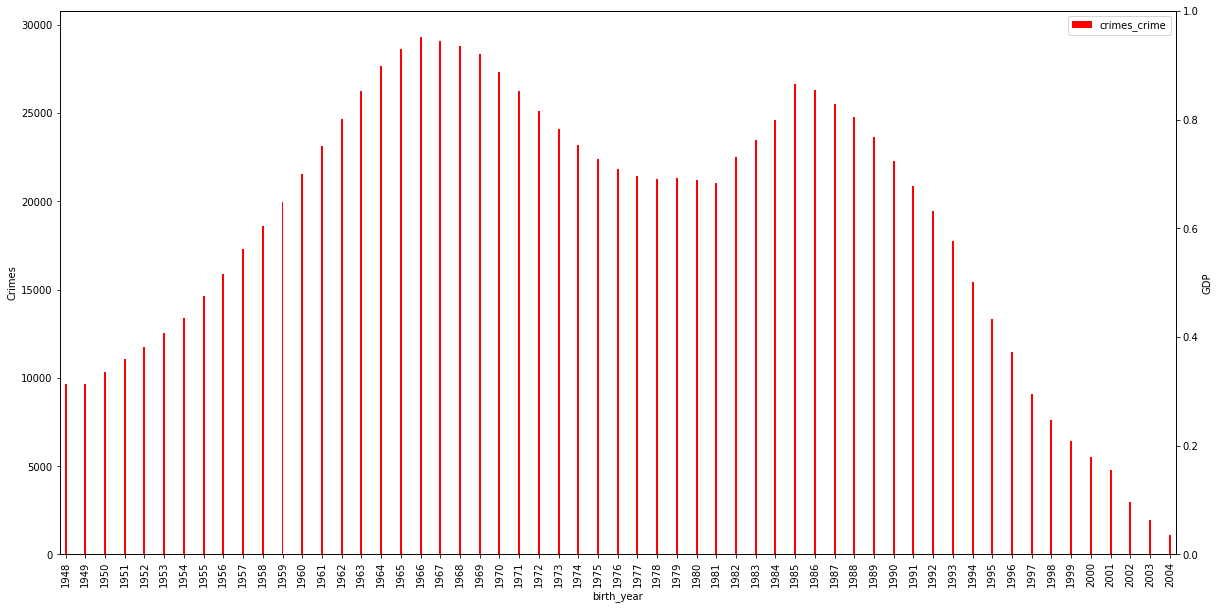

In [157]:
import matplotlib.pyplot as plt

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

r.plot(y='crimes_crime', x='birth_year', color='red', ax=ax, kind='bar', figsize=(20, 10), width=0.1)
# df9.plot(y='BIP_mia_GDP', x='birth_year', color='blue', ax=ax2, kind='bar', figsize=(20, 10), position=0, width=0.3)

ax.set_ylabel('Crimes')
ax2.set_ylabel('GDP')

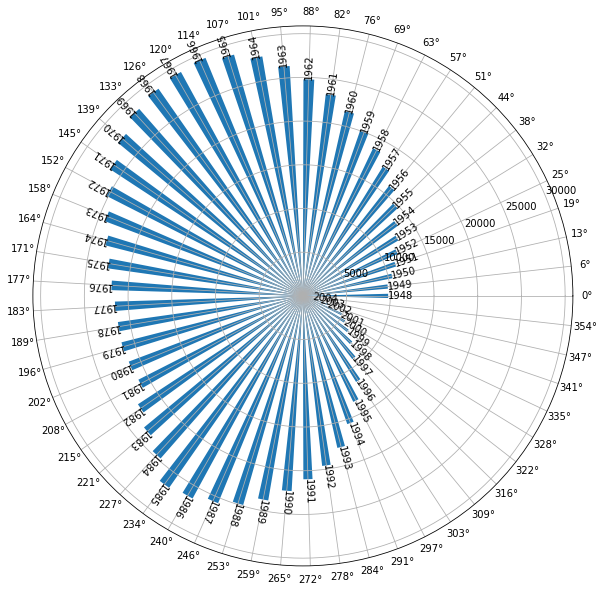

In [156]:
dfList = list(r['birth_year'])


lObjectsALLcnts = r.crimes_crime

lObjectsALLlbls = dfList

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

bottom=30

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = 0.05 
#(2*np.pi)/iN *0.9

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=100)
ax.set_xticks(theta)
plt.axis()

rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    lab = ax.text(x,bottom+bar.get_height() , label, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)   
plt.show()

# df9.plot(y='crimes_crime', x='birth_year', color='red', ax=ax, kind='bar', figsize=(20, 10), width=0.1)

In [145]:
df9.birth_year

18    1966
19    1967
20    1968
17    1965
21    1969
16    1964
22    1970
37    1985
38    1986
23    1971
15    1963
39    1987
24    1972
40    1988
14    1962
36    1984
25    1973
41    1989
35    1983
26    1974
13    1961
34    1982
27    1975
42    1990
28    1976
12    1960
29    1977
31    1979
30    1978
32    1980
33    1981
43    1991
11    1959
44    1992
10    1958
45    1993
9     1957
8     1956
46    1994
7     1955
6     1954
47    1995
5     1953
4     1952
48    1996
3     1951
2     1950
1     1949
0     1948
49    1997
50    1998
51    1999
52    2000
53    2001
54    2002
55    2003
56    2004
Name: birth_year, dtype: int64

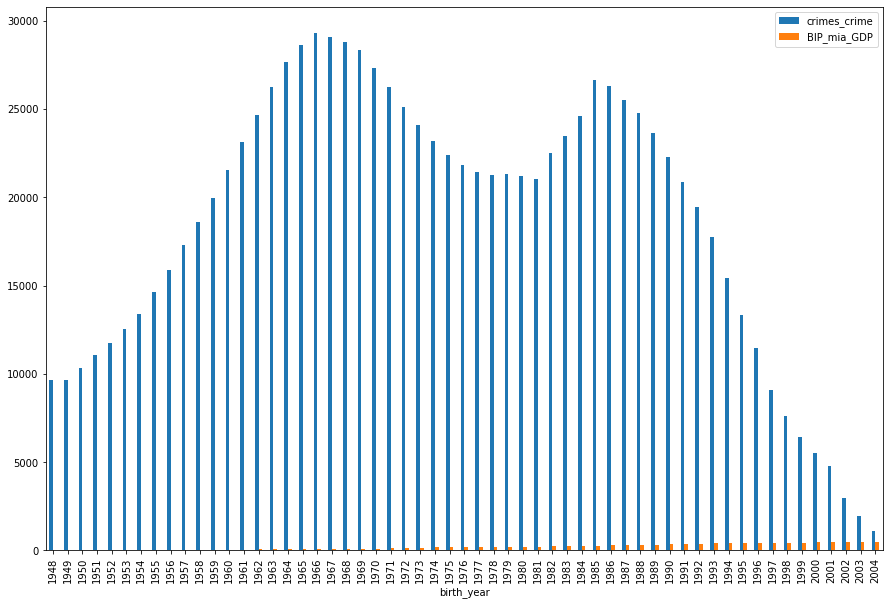

In [89]:
r.plot(x='birth_year', y=['crimes_crime', "BIP_mia_GDP"], kind='bar', figsize=(15, 10))

In [86]:
r['crimes_crime_per_1000'] = r['crimes_crime']/1000

In [87]:
r.head()

,birth_year,crimes_crime,BIP_mia_GDP,crimes_crime_per_1000
0,1948,9654,22.034,9.654
1,1949,9660,21.753,9.660
2,1950,10340,22.924,10.340
3,1951,11072,25.125,11.072
4,1952,11748,26.547,11.748


In [82]:
r = r.reset_index()

In [62]:
df7.groupby("birth_year").BIP_mia.mean()

birth_year
1948     22.034
1949     21.753
1950     22.924
1951     25.125
1952     26.547
1953     27.865
1954     29.527
1955     31.851
1956     34.245
1957     36.429
1958     37.453
1959     39.777
1960     43.752
1961     49.220
1962     54.582
1963     60.021
1964     66.530
1965     71.254
1966     76.517
1967     82.365
1968     87.950
1969     95.297
1970    106.150
1971    120.586
1972    136.644
1973    152.274
1974    165.199
1975    164.093
1976    166.206
1977    170.690
1978    177.581
1979    185.624
1980    199.422
1981    214.085
1982    226.807
1983    233.659
1984    249.738
1985    264.792
1986    277.898
1987    288.496
1988    306.265
1989    330.580
1990    358.506
1991    374.437
1992    382.225
1993    390.608
1994    400.252
1995    405.144
1996    407.993
1997    415.825
1998    427.756
1999    435.506
2000    459.447
2001    470.218
2002    469.788
2003    475.270
2004    490.142
Name: BIP_mia, dtype: float64

In [90]:
# df7.plot(x='birth_year', y=['crimes', 'BIP_mia'], kind='bar', figsize=(15, 10))

In [59]:
df7.to_csv('data_best_1208.csv')

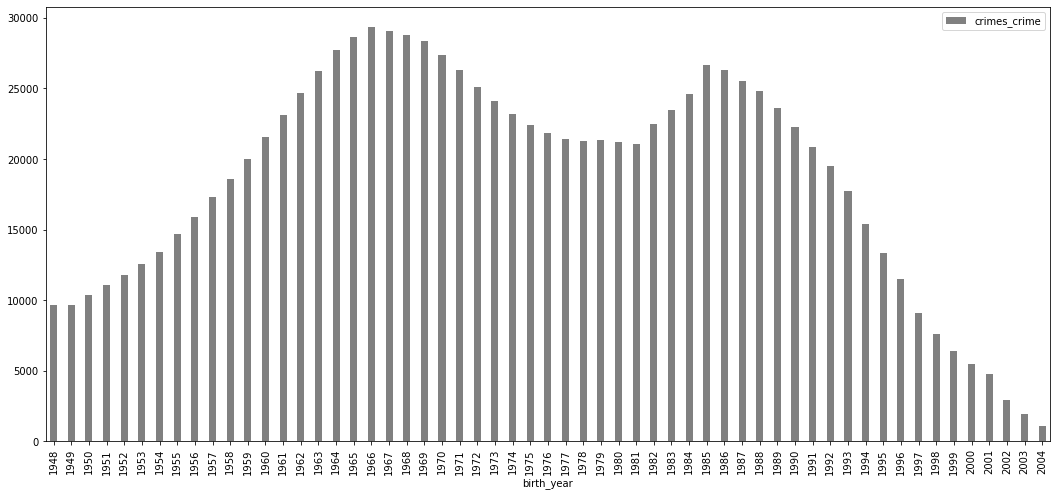

In [171]:
r.plot(y='crimes_crime', x='birth_year', kind='bar', figsize=(18, 8), width=0.4, color='grey')

fig.tight_layout()

plt.savefig("crimes.pdf", transparent=True)